In [106]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px


In [52]:
data = pd.read_csv('mcdonalds.csv')

**STEP 3: COLLECTING AND EXPLORING THE DATA**

In [53]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [55]:
data.shape

(1453, 15)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [57]:
print(pd.isnull(data).sum()) #No null values are present in any of the columns

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


In [58]:
data.describe() 

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [59]:
data.nunique()

yummy              2
convenient         2
spicy              2
fattening          2
greasy             2
fast               2
cheap              2
tasty              2
expensive          2
healthy            2
disgusting         2
Like              11
Age               54
VisitFrequency     6
Gender             2
dtype: int64

In [60]:
bin = data.iloc[:,0:11] #separating our binary features


In [61]:
bin

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No


In [62]:
x = pd.get_dummies(bin) #converting into binary


In [63]:
x = x.drop(x.columns[0::2], axis = 1) #Dropping "ColumnName_No"

In [ ]:
x.mean()

yummy_Yes         0.552650
convenient_Yes    0.907777
spicy_Yes         0.093599
fattening_Yes     0.867171
greasy_Yes        0.526497
fast_Yes          0.900206
cheap_Yes         0.598761
tasty_Yes         0.644184
expensive_Yes     0.357880
healthy_Yes       0.198899
disgusting_Yes    0.242946
dtype: float64

**STEP 4: DATA PREPROCESSING**

In [ ]:
from sklearn.manifold import TSNE
m = TSNE(learning_rate = 50)

In [ ]:
tsne_features = m.fit_transform(x)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [ ]:
tsne_features[1:4, : ]

array([[19.219515 ,  4.123293 ],
       [ 6.0136604, -8.861827 ],
       [24.066599 ,  0.8238999]], dtype=float32)

In [ ]:
x['x'] = tsne_features[:,0]
x['y'] = tsne_features[:,1]

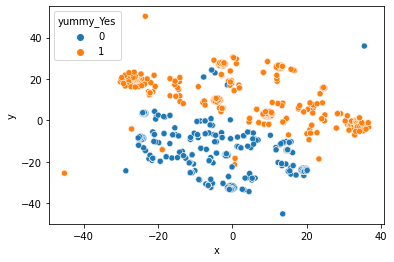

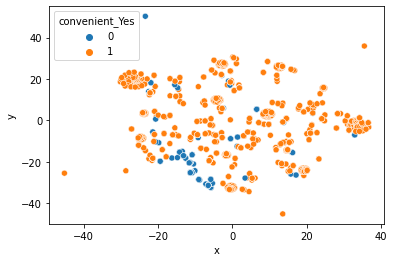

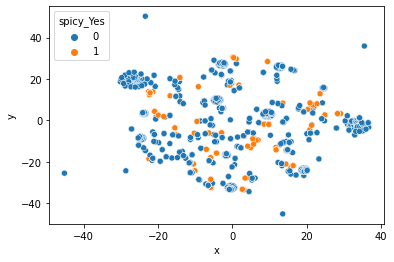

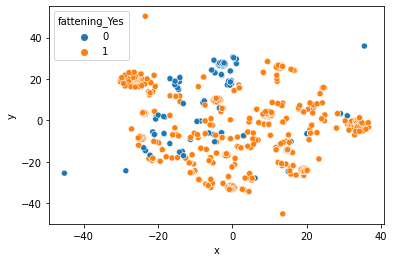

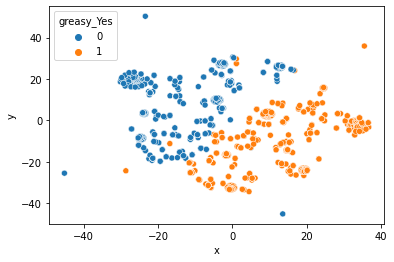

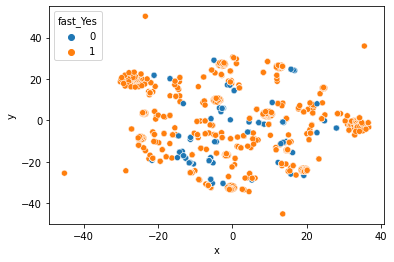

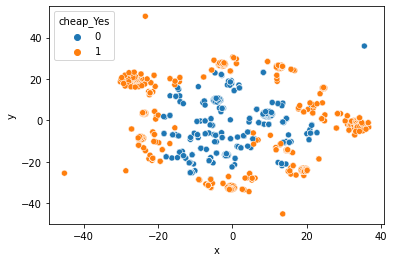

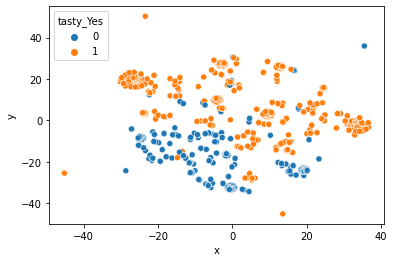

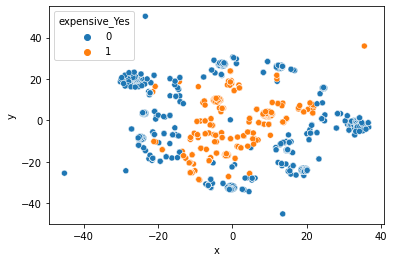

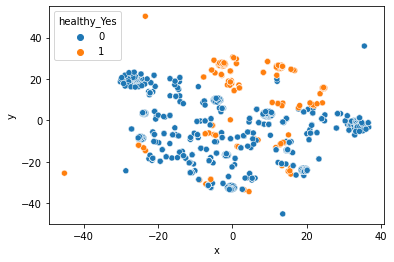

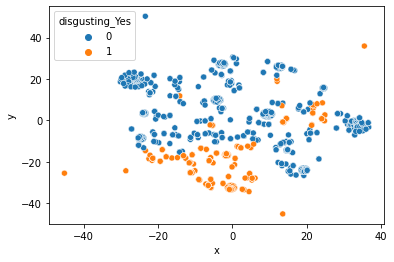

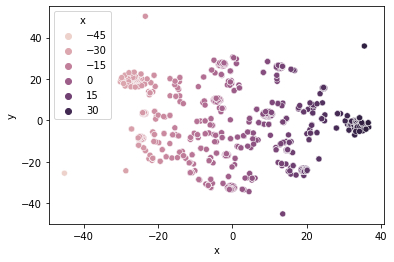

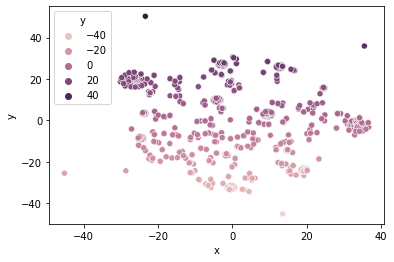

In [ ]:
for feature in x.columns:
  sns.scatterplot(x="x", y="y",hue = feature, data = x)
  plt.show()

**STEP 8: SEGMENT EVALUATION**

In [67]:
df = pd.read_csv("segment_data.csv")

In [115]:
# renaming the segments
df['segment'] = df['segment'].replace([0,1,2,3,4,5,6,7],['Segment 0',"Segment 1","Segment 2","Segment 3",
                                                        "Segment 4","Segment 5","Segment 6","Segment 7"])


In [116]:
df.head()


,Unnamed: 0,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,Gender,segment
0,0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Female,Segment 1
1,1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Female,Segment 0
2,2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Female,Segment 5
3,3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Female,Segment 0
4,4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Male,Segment 1


In [112]:
#Pie chart to visualize the relative size of each cluster

pie=df.groupby('segment').size().reset_index()
pie.columns=['segment','value']
px.pie(pie,values='value',names='segment',color=['blue','red','green','yellow','violet','indigo','orange','cyan'])

In [117]:
#Compare features

avg_data = df.groupby(['segment'], as_index=False).mean()
avg_data

,segment,Unnamed: 0,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Age
0,Segment 0,719.930233,0.916279,0.986047,0.000000,1.000000,1.000000,0.967442,0.920930,0.972093,0.060465,0.158140,0.111628,33.516279
1,Segment 1,745.787736,0.051887,1.000000,0.000000,0.952830,0.533019,0.919811,0.650943,0.127358,0.250000,0.099057,0.000000,51.391509
2,Segment 2,713.522523,0.009009,0.000000,0.045045,0.864865,0.738739,0.621622,0.333333,0.063063,0.639640,0.054054,0.819820,49.234234
3,Segment 3,712.448980,0.857143,0.987755,0.000000,1.000000,0.000000,0.967347,0.889796,0.979592,0.020408,0.253061,0.012245,44.444898
4,Segment 4,696.596026,0.807947,0.947020,0.092715,0.000000,0.059603,0.940397,0.721854,0.874172,0.192053,0.682119,0.026490,50.059603
5,Segment 5,647.324786,0.538462,0.974359,1.000000,0.914530,0.666667,0.948718,0.615385,0.752137,0.452991,0.264957,0.290598,50.589744
6,Segment 6,782.522222,0.027778,1.000000,0.000000,0.977778,0.800000,0.900000,0.538889,0.161111,0.438889,0.016667,1.000000,45.661111
7,Segment 7,749.810811,0.873874,0.972973,0.000000,0.986486,0.558559,0.828829,0.004505,0.918919,0.977477,0.130631,0.076577,39.004505


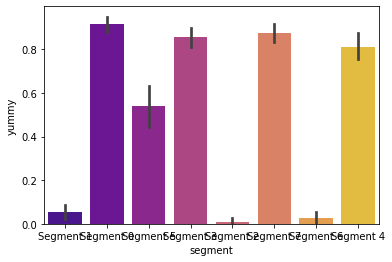

In [119]:
sns.barplot(x=df['segment'],y=df['yummy'],palette="plasma",data=avg_data)

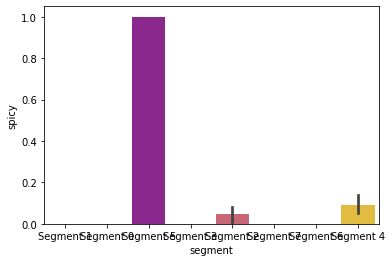

In [120]:
sns.barplot(x=df['segment'],y=df['spicy'],palette="plasma",data=avg_data)


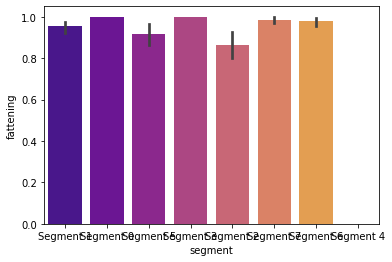

In [129]:
sns.barplot(x=df['segment'],y=df['fattening'],palette="plasma",data=avg_data)


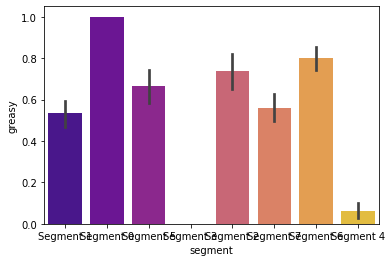

In [128]:
sns.barplot(x=df['segment'],y=df['greasy'],palette="plasma",data=avg_data)


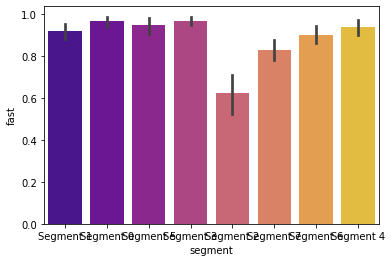

In [127]:
sns.barplot(x=df['segment'],y=df['fast'],palette="plasma",data=avg_data)



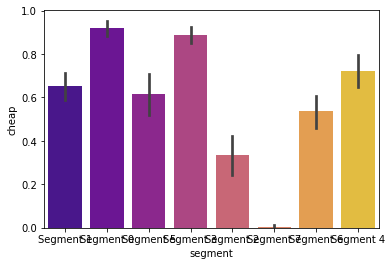

In [126]:
sns.barplot(x=df['segment'],y=df['cheap'],palette="plasma",data=avg_data)


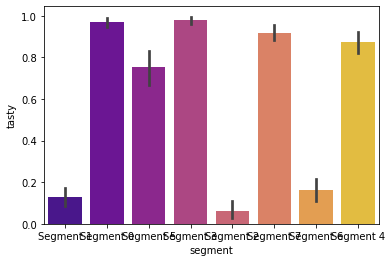

In [125]:
sns.barplot(x=df['segment'],y=df['tasty'],palette="plasma",data=avg_data)


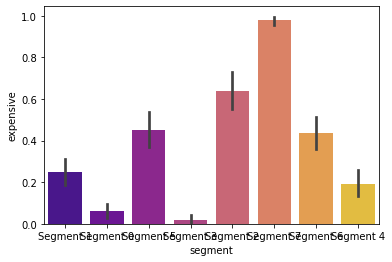

In [124]:
sns.barplot(x=df['segment'],y=df['expensive'],palette="plasma",data=avg_data)


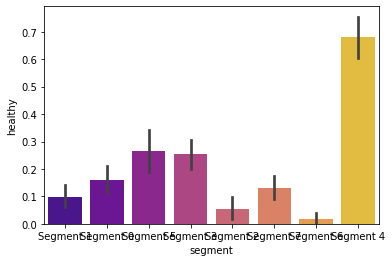

In [123]:
sns.barplot(x=df['segment'],y=df['healthy'],palette="plasma",data=avg_data)


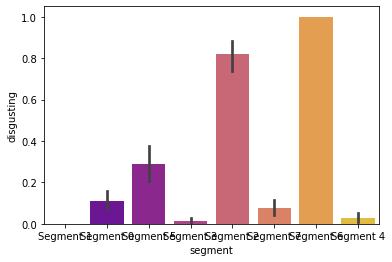

In [121]:
sns.barplot(x=df['segment'],y=df['disgusting'],palette="plasma",data=avg_data)

GENDER BREAKDOWN


In [105]:
#compare distribution of gender (male/Female) accross segments
df2 = pd.DataFrame(df.groupby(['segment','Gender'])['Gender'].count())
df2

Gender
segment Gender        
0       Female     134
        Male        81
1       Female     119
        Male        93
2       Female      49
        Male        62
3       Female     154
        Male        91
4       Female      77
        Male        74
5       Female      55
        Male        62
6       Female      95
        Male        85
7       Female     105
        Male       117